This is a practice notebook for the Seaborn intermediate course on [DataCamp](https://campus.datacamp.com/courses/intermediate-data-visualization-with-seaborn/seaborn-introduction?ex=1)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns # also for data (diamonds)
import pandas as pd
import numpy as np

In [2]:
data = sns.load_dataset('diamonds', cache=True, data_home=None)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


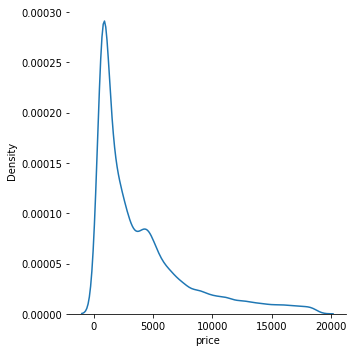

<Figure size 432x288 with 0 Axes>

In [3]:
sns.displot(data['price'], kind = 'kde')
sns.despine(left = True)

plt.show()
plt.clf()

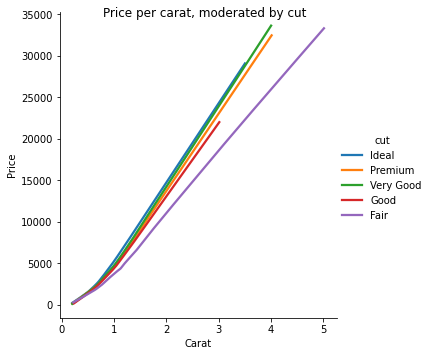

<Figure size 432x288 with 0 Axes>

In [4]:
import statsmodels

# regression plot
sns.set_style()
g = sns.lmplot(data = data, x = 'carat', y = 'price', 
          hue = 'cut', markers = '.', 
          scatter = False, lowess = True, ci = 95)
g.set(xlabel = 'Carat', 
    ylabel = 'Price')
g.fig.suptitle('Price per carat, moderated by cut')

plt.show()
plt.clf()

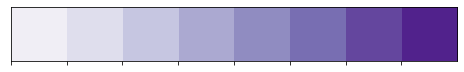

In [5]:
pal = sns.color_palette('Purples', 8)
sns.palplot(pal)

In [6]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


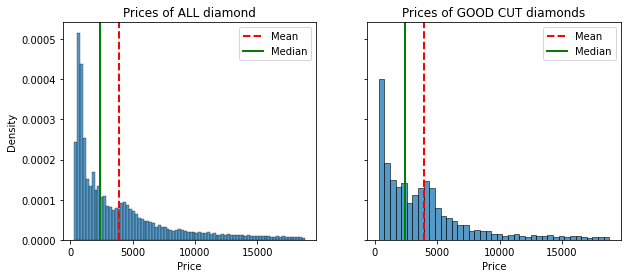

In [7]:
# combining plt and sns


# instantiate plot
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (10, 4))

# plot histograms
sns.histplot(data['price'], stat = 'density', ax = ax0)
sns.histplot(data.query('cut == "Good"')['price'], stat = 'density', ax = ax1)

# customise labels
ax0.set(xlabel = 'Price', 
      title = 'Prices of ALL diamond')

ax1.set(xlabel = 'Price', 
      title = 'Prices of GOOD CUT diamonds')

# Add vertical lines for the mean and median
ax0.axvline(x = data['price'].mean(), color = 'r', label = 'Mean', linestyle = '--', linewidth = 2)
ax0.axvline(x = data['price'].median(), color = 'g', label = 'Median', linestyle = '-', linewidth = 2)

ax1.axvline(x = data['price'].mean(), color = 'r', label = 'Mean', linestyle = '--', linewidth = 2)
ax1.axvline(x = data['price'].median(), color = 'g', label = 'Median', linestyle = '-', linewidth = 2)

# display
ax0.legend()
ax1.legend()
plt.show()

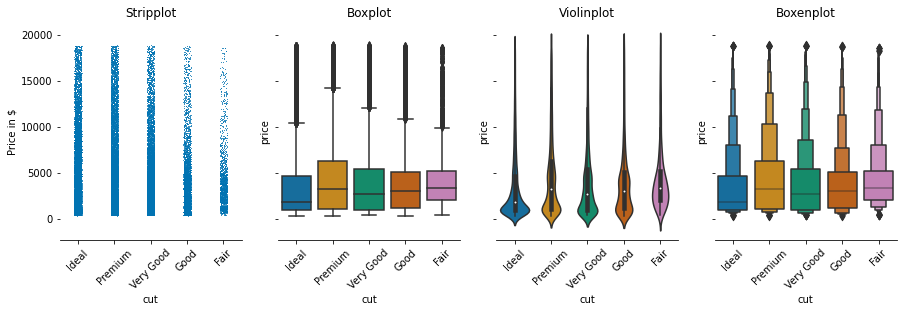

In [14]:
# creating multiple categorical plots

# lazy argumenting
x = data['cut']
y = data['price']

sns.set_palette('colorblind')

# instatiate of plots
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 4, 
                                        figsize = (15, 4), 
                                         sharey = True)

# plotting
sns.stripplot(x = x, y = y,ax = ax0, size = 1)
sns.boxplot(x = x, y = y, ax = ax1)
sns.violinplot(x = x, y = y, ax = ax2)
sns.boxenplot(x = x, y = y, ax = ax3)


# customisation
ax0.set(title = 'Stripplot', ylabel = 'Price in $', alpha = 0.1)
ax0.tick_params(axis = 'x', labelrotation=45)

ax1.set(title = 'Boxplot')
ax1.tick_params(axis = 'x', labelrotation=45)

ax2.set(title = 'Violinplot')
ax2.tick_params(axis = 'x', labelrotation=45)

ax3.set(title = 'Boxenplot')
ax3.tick_params(axis = 'x', labelrotation=45)


# display
sns.despine(left = True)
plt.show()


ValueError: Could not interpret value `carat` for parameter `hue`

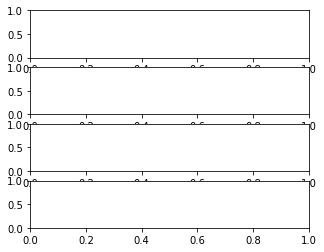

In [18]:
# creating multiple categorical plots

# lazy argumenting
x = data['cut']
y = data['price']

sns.set_palette('colorblind')

# instatiate of plots
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows = 4, ncols = 1, 
                                        figsize = (5, 4), 
                                         sharey = True)

# plotting
sns.stripplot(x = x, y = y, hue = 'carat', ax = ax0, size = 1)
sns.boxplot(x = x, y = y, ax = ax1)
sns.violinplot(x = x, y = y, ax = ax2)
sns.boxenplot(x = x, y = y, ax = ax3)


# customisation
ax0.set(title = 'Stripplot', ylabel = 'Price in $', alpha = 0.1)
ax0.tick_params(axis = 'x', labelrotation=45)

ax1.set(title = 'Boxplot')
ax1.tick_params(axis = 'x', labelrotation=45)

ax2.set(title = 'Violinplot')
ax2.tick_params(axis = 'x', labelrotation=45)

ax3.set(title = 'Boxenplot')
ax3.tick_params(axis = 'x', labelrotation=45)


# display
sns.despine(left = True)
plt.show()
